In [1]:
from datetime import date, time, timedelta, datetime
import numpy as np
import pandas as pd
import tsutils as ts
import plotly.graph_objects as go

In [2]:
dates = ['2022-09-02', '2022-09-06', '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-12', '2022-09-13', '2022-09-14', '2022-09-15', '2022-09-16']
prices = [295.17, 293.05, 298.97, 300.52, 307.09, 310.74, 293.7, 296.03, 291.1, 289.32]
# use to_datetime to ensure a DatetimeIndex is created
df = pd.DataFrame({'price':prices}, index=pd.to_datetime(dates))

In [3]:
d = pd.to_datetime('2022-09-12')
df[d:]

,price
2022-09-12,310.74
2022-09-13,293.70
2022-09-14,296.03
2022-09-15,291.10
2022-09-16,289.32


In [12]:
def plot(df):
    mondays = pd.date_range(start=date(2024,9,1), periods=10, freq=pd.offsets.Week(weekday=0))
    ms = df[df.index.isin(mondays)]
    
    tm = df.index.strftime("%b %d")
    fig = go.Figure(data=[go.Candlestick(x=tm,
                    open=df['open'],
                    high=df['high'],
                    low=df['low'],
                    close=df['close'])])
    x = 0
    for i,r in ms.iterrows():
        y = r['open']
        fig.add_shape(type="line",
            x0=x, x1=min(x+5, len(tm)),  
            y0=y, y1=y,
            line=dict(color="green", dash="dash"),
        )
        x += 5
    fig.update_layout(xaxis_rangeslider_visible=False, height=600)
    fig.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2022-09-02 to 2022-09-16
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   10 non-null     float64
dtypes: float64(1)
memory usage: 460.0 bytes


In [5]:
df = ts.load_files("esz4*.csv")
di = ts.day_index(df)
df_day = ts.aggregate_daily_bars(df, di, 'first', 'last')
df_day

loaded C:\Users\niroo\Documents\data\ESZ4 20240916.csv 13800 8
loaded C:\Users\niroo\Documents\data\ESZ4 20240930.csv 6900 8


,open,high,low,close,volume,vwap,change,gap,day_chg,range,strat
date,,,,,,,,,,,
2024-09-16,5684.00,5702.75,5669.50,5694.75,645285,5688.72,NaN,NaN,10.75,33.25,0
2024-09-17,5694.25,5737.00,5677.75,5701.25,1115931,5708.10,6.50,-0.50,7.00,59.25,1
2024-09-18,5701.00,5755.75,5675.25,5689.75,1445385,5704.71,-11.50,-0.25,-11.25,80.50,3
2024-09-19,5693.00,5797.50,5691.00,5774.50,1498956,5771.11,84.75,3.25,81.50,106.50,1
2024-09-20,5776.00,5776.75,5733.50,5758.25,1431283,5757.82,-16.25,1.50,-17.75,43.25,0
2024-09-23,5762.00,5784.50,5745.25,5774.75,1013952,5772.39,16.50,3.75,12.75,39.25,1
2024-09-24,5774.00,5794.25,5754.75,5792.75,1112379,5778.90,18.00,-0.75,18.75,39.50,1
2024-09-25,5792.25,5798.75,5768.00,5783.25,973057,5784.42,-9.50,-0.50,-9.00,30.75,1
2024-09-26,5783.50,5830.00,5778.25,5803.75,1275124,5804.47,20.50,0.25,20.25,51.75,1


In [18]:
df_rth = ts.aggregate_daily_bars(df, di, 'rth_first', 'rth_last')
df_rth

,open,high,low,close,volume,vwap,change,gap,day_chg,range,strat
date,,,,,,,,,,,
2024-09-16,5688.75,5702.75,5669.50,5700.50,552300,5688.15,NaN,NaN,11.75,33.25,0
2024-09-17,5722.00,5737.00,5677.75,5702.00,956896,5707.64,1.50,21.50,-20.00,59.25,1
2024-09-18,5707.25,5755.75,5675.25,5680.75,1279597,5705.45,-21.25,5.25,-26.50,80.50,3
2024-09-19,5778.25,5797.50,5748.25,5777.75,1138624,5776.25,97.00,97.50,-0.50,49.25,1
2024-09-20,5760.50,5775.00,5733.50,5763.00,1148724,5756.10,-14.75,-17.25,2.50,41.50,2
2024-09-23,5774.50,5784.50,5761.00,5776.25,816231,5773.06,13.25,11.50,1.75,23.50,1
2024-09-24,5784.25,5794.25,5754.75,5793.00,902302,5778.06,16.75,8.00,8.75,39.50,3
2024-09-25,5790.50,5798.75,5768.00,5779.25,797684,5784.50,-13.75,-2.50,-11.25,30.75,1
2024-09-26,5823.75,5827.25,5778.25,5803.00,1024694,5801.78,23.75,44.50,-20.75,49.00,1


In [7]:
di

,first,last,rth_first,rth_last,duration
date,,,,,
2024-09-16,2024-09-15 23:00:00,2024-09-16 21:59:00,2024-09-16 14:30:00,2024-09-16 20:59:00,1380.0
2024-09-17,2024-09-16 23:00:00,2024-09-17 21:59:00,2024-09-17 14:30:00,2024-09-17 20:59:00,1380.0
2024-09-18,2024-09-17 23:00:00,2024-09-18 21:59:00,2024-09-18 14:30:00,2024-09-18 20:59:00,1380.0
2024-09-19,2024-09-18 23:00:00,2024-09-19 21:59:00,2024-09-19 14:30:00,2024-09-19 20:59:00,1380.0
2024-09-20,2024-09-19 23:00:00,2024-09-20 21:59:00,2024-09-20 14:30:00,2024-09-20 20:59:00,1380.0
2024-09-23,2024-09-22 23:00:00,2024-09-23 21:59:00,2024-09-23 14:30:00,2024-09-23 20:59:00,1380.0
2024-09-24,2024-09-23 23:00:00,2024-09-24 21:59:00,2024-09-24 14:30:00,2024-09-24 20:59:00,1380.0
2024-09-25,2024-09-24 23:00:00,2024-09-25 21:59:00,2024-09-25 14:30:00,2024-09-25 20:59:00,1380.0
2024-09-26,2024-09-25 23:00:00,2024-09-26 21:59:00,2024-09-26 14:30:00,2024-09-26 20:59:00,1380.0


In [8]:
ts.create_day_summary(df, di)

,glbx_high,glbx_low,rth_open,rth_high,rth_low,close,rth_high_tm,rth_low_tm,rth_h1_high,rth_h1_low
date,,,,,,,,,,
2024-09-16,5699.25,5683.00,5688.75,5702.75,5669.50,5700.50,2024-09-16 20:57:00,2024-09-16 15:34:00,5700.50,5679.00
2024-09-17,5726.75,5690.50,5722.00,5737.00,5677.75,5702.00,2024-09-17 15:47:00,2024-09-17 18:45:00,5733.50,5711.25
2024-09-18,5711.50,5698.25,5707.25,5755.75,5675.25,5680.75,2024-09-18 19:01:00,2024-09-18 20:48:00,5709.25,5690.75
2024-09-19,5779.00,5691.00,5778.25,5797.50,5748.25,5777.75,2024-09-19 18:46:00,2024-09-19 14:52:00,5782.00,5748.25
2024-09-20,5776.75,5758.75,5760.50,5775.00,5733.50,5763.00,2024-09-20 20:38:00,2024-09-20 16:16:00,5767.25,5745.50
2024-09-23,5781.75,5745.25,5774.50,5784.50,5761.00,5776.25,2024-09-23 15:23:00,2024-09-23 18:01:00,5784.50,5763.50
2024-09-24,5793.50,5763.75,5784.25,5794.25,5754.75,5793.00,2024-09-24 20:59:00,2024-09-24 15:40:00,5785.25,5756.25
2024-09-25,5794.50,5773.50,5790.50,5798.75,5768.00,5779.25,2024-09-25 15:07:00,2024-09-25 18:35:00,5798.75,5788.00
2024-09-26,5830.00,5780.75,5823.75,5827.25,5778.25,5803.00,2024-09-26 14:30:00,2024-09-26 18:19:00,5827.25,5804.00


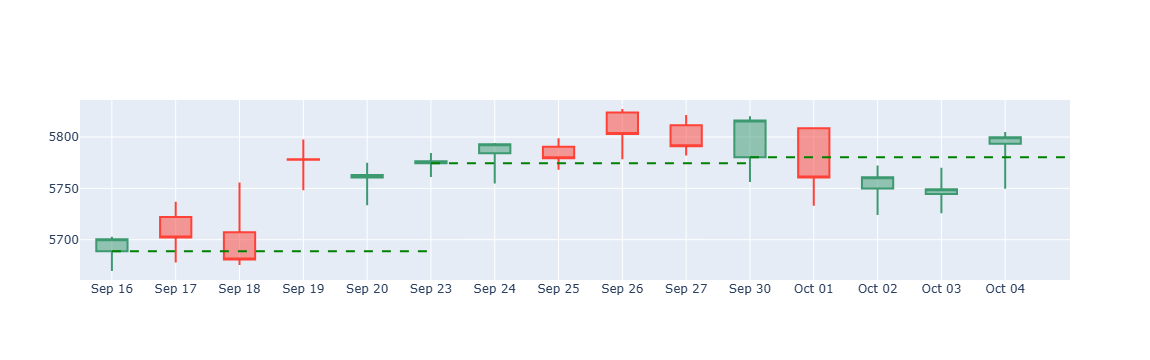

In [19]:
plot(df_rth)

In [10]:
mons = pd.date_range(start=date(2024,9,1), periods=10, freq=pd.offsets.Week(weekday=0))
df_rth[df_rth.index.isin(mons)]
mons

DatetimeIndex(['2024-09-02', '2024-09-09', '2024-09-16', '2024-09-23',
               '2024-09-30', '2024-10-07', '2024-10-14', '2024-10-21',
               '2024-10-28', '2024-11-04'],
              dtype='datetime64[ns]', freq='W-MON')